In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk

In [9]:
true_news = pd.read_csv('True.csv', names=['text'])
false_news = pd.read_csv('Fake.csv', names=['text'])

In [ ]:
true_news['label'] = 1
false_news['label'] = 0 

In [11]:
data = pd.concat([true_news, false_news], ignore_index=True)

In [12]:
data = data.sample(frac=1).reset_index(drop=True)

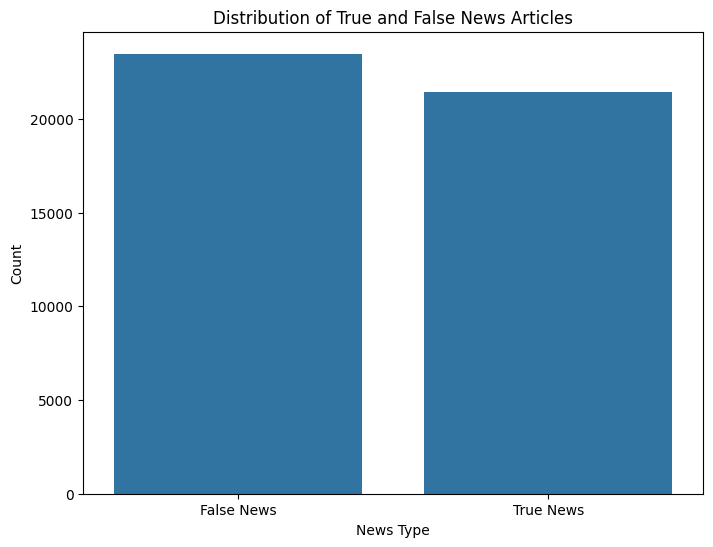

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data)
plt.title('Distribution of True and False News Articles')
plt.xticks([0, 1], ['False News', 'True News'])
plt.ylabel('Count')
plt.xlabel('News Type')
plt.show()

In [14]:
X = data['text']
y = data['label']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [17]:
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [18]:
y_pred = model.predict(X_test_vectorized)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [20]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.7979955456570156
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80      4754
           1       0.76      0.84      0.80      4226

    accuracy                           0.80      8980
   macro avg       0.80      0.80      0.80      8980
weighted avg       0.80      0.80      0.80      8980

